# Predict the different species of flowers on the length of there petals and sepals

### Importing Libraries 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Load the Iris dataset


In [10]:
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species)

### Introduce some missing values to simulate incomplete data


In [11]:
np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.2
X[missing_mask] = np.nan

### Impute missing values using SimpleImputer


In [12]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

### Split the imputed dataset into training and testing sets


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classifiers techniques 

In [15]:
classifiers = [
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42))
]

accuracies = []
# Train and evaluate classifiers
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy:.2f}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Accuracy: 0.90
Decision Tree Accuracy: 0.93
Random Forest Accuracy: 0.97
Gradient Boosting Accuracy: 0.97
Support Vector Machine Accuracy: 0.93


### Visualize accuracies


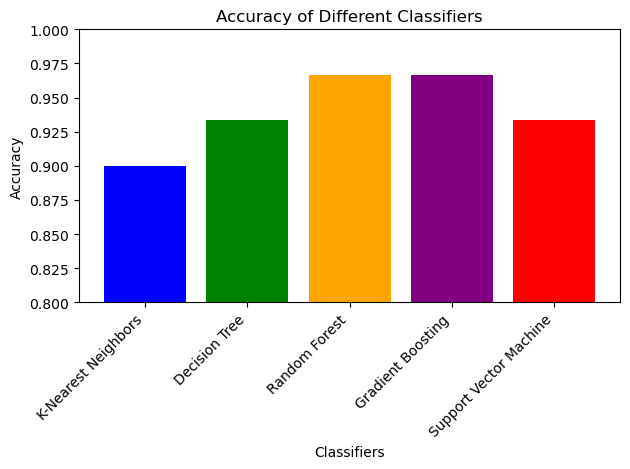

In [17]:
plt.bar([name for name, _ in classifiers], accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()